In [2]:
library(Seurat)
library(dplyr)

scRNA = readRDS('./after_rename.rds')

Warning message:
“package ‘Seurat’ was built under R version 4.2.3”
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
gene = read.table('./sec.protein.txt',header =T)

In [7]:


Idents(scRNA) ='orig.ident'

df <- as.data.frame(AverageExpression(object = scRNA)$RNA)
library(tidyr)
df %>%
    filter(row.names(.) %in% gene$gene) %>% 
    apply(., 1, function(y) (y - mean(y)) / sd(y) ^ as.logical(sd(y))) %>% 
          t() -> df2
df2 %>% as.data.frame() %>% 
    tibble::rownames_to_column(var = "gene")%>%
    right_join(gene) %>%
    pivot_longer(cols = `control`:`MI7d`, names_to = "cluster_name", values_to = "exp")%>%
    group_by(gene) %>%
    mutate(exp = as.numeric(scale(exp))) %>%
    dplyr::ungroup() -> df3

cluster_name <- c("control",'MI3d','MI7d','MI14d')



Joining with `by = join_by(gene)`


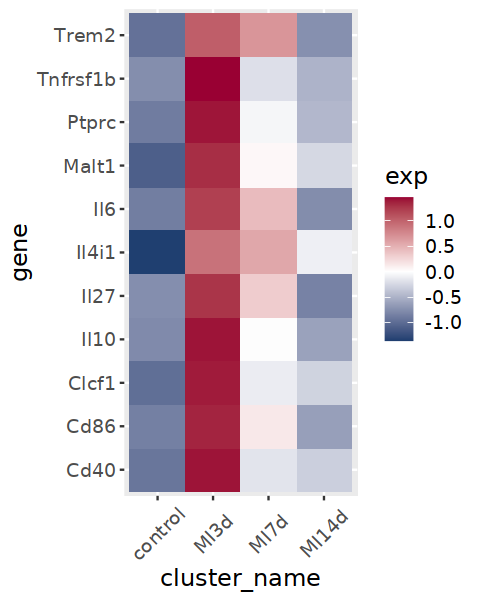

In [8]:
library(ggplot2)
options(repr.plot.height = 5,repr.plot.width = 4)
df3 %>% ggplot(aes(x = cluster_name,
               y = gene,
               fill = exp)) +
    geom_tile() +
    scale_fill_gradient2(low="#003366", high="#990033", mid="white") +
    scale_x_discrete(limits = cluster_name) +
  theme(axis.text.x =element_text(angle =45,hjust =0.5,vjust = 0.5))+ theme(text = element_text(size = 14))

In [9]:
ggsave('heatmap.pdf',width = 5,height = 6)

In [4]:
membrane_related = read.table('./membrane.txt',header =T)

In [6]:
gene$gene = toupper(gene$gene)

In [7]:
intersect(gene$gene,membrane_related$Gene)

[1] "IL10"     "PTPRC"    "CD40"     "TNFRSF1B" "IL6"      "IL4I1"   
 [7] "IL27"     "CD86"     "TREM2"    "MALT1"    "CLCF1"

In [8]:
gene = c('Il10','Ptprc','Cd40','Tnfrsf1b','Il6','Il4i1','Il27','Cd86','Trem2','Malt1','Clcf1')

In [10]:
Idents(scRNA) ='orig.ident'

df <- as.data.frame(AverageExpression(object = scRNA)$RNA)


,control,MI14d,MI3d,MI7d
,<dbl>,<dbl>,<dbl>,<dbl>
Il10,6.494758e-05,0.004177042,0.05548098,0.01944891
Ptprc,1.554661e+00,2.578739622,7.21310706,3.58749987
Cd40,1.498300e-01,0.171425250,0.23163725,0.17633015
Tnfrsf1b,1.900707e-01,0.289813198,1.05128137,0.40519999
Il6,4.630219e-02,0.054554736,0.20719654,0.14680976
Il4i1,6.801856e-02,0.101548166,0.12845982,0.11926544
Il27,3.744907e-03,0.002651868,0.02975903,0.01753029
Cd86,4.495189e-02,0.113052397,0.71797490,0.34939521
Trem2,2.153546e-02,0.152379750,1.20464001,0.99641085


In [11]:
library(tidyr)
df1 = df %>%
    filter(row.names(.) %in% gene)

In [17]:
rownames(df1)

[1] "Il10"     "Ptprc"    "Cd40"     "Tnfrsf1b" "Il6"      "Il4i1"   
 [7] "Il27"     "Cd86"     "Trem2"    "Malt1"    "Clcf1"

In [19]:
write.table(df1,file= 'sec.protein.txt',quote = F,sep = '\t')